# Interactive workbook of biostatistics

Press Ctrl + Enter in every code cell to run it and see the results.

In [17]:
!pip install -U -q ipywidgets numpy matplotlib
!jupyter nbextension enable --py widgetsnbextension
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from collections import Counter
import matplotlib
matplotlib.rcParams['figure.dpi'] = 72
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.random.seed(42)

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Descriptive statistics

### Histograms

#### Discrete variables - which can take only a few defined values

The first exercise, is of course, to make a histogram, which is just a representation of a frequency distribution table. This is the distribution of shoe sizes in a class: 

| Shoe size | Number of students|
|-----------|-------------------|
| 7         | 7                 |
| 7.5       | 9                 |
| 8         | 14                |
| 8.5       | 20                |
| 9         | 13                |
| 9.5       | 8                 |
| 10        | 2                 |

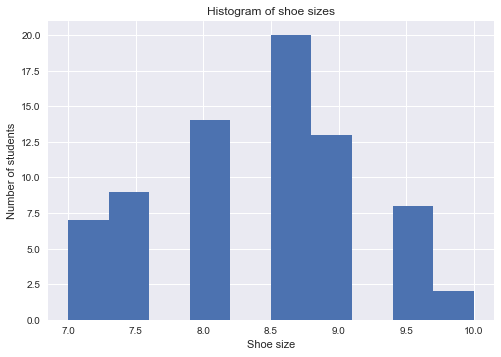

In [18]:
# Histograms
shoe_sizes = [7,7,7,7,7,7,7,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,\
               8,8,8,8,8,8,8,8,8,8,8,8,8,8,8.5,8.5,8.5,8.5,8.5,8.5,\
               8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,8.5,\
               8.5,9,9,9,9,9,9,9,9,9,9,9,9,9,9.5,9.5,9.5,9.5,9.5,\
               9.5,9.5,9.5,10,10]
plt.hist(shoe_sizes)
plt.xlabel('Shoe size')
plt.ylabel('Number of students')
plt.title('Histogram of shoe sizes')
plt.show()

#### Continuous variables - which may have any fractional value

Following is the fasting blood sugar of 100 patients.

In [19]:
fasting_sugars = np.round(np.random.sample(100)*120,2)+30
fasting_sugars

array([ 74.94, 144.09, 117.84, 101.84,  48.72,  48.72,  36.97, 133.94,
       102.13, 114.97,  32.47, 146.39, 129.89,  55.48,  51.82,  52.01,
        66.51,  92.97,  81.83,  64.95, 103.42,  46.74,  65.06,  73.96,
        84.73, 124.22,  53.96,  91.71, 101.09,  35.57, 102.91,  50.46,
        37.81, 143.87, 145.88, 127.01,  66.55,  41.72, 112.11,  82.82,
        44.64,  89.42,  34.13, 139.12,  61.05, 109.5 ,  67.41,  92.41,
        95.61,  52.18, 146.35, 123.02, 142.74, 137.38, 101.75, 140.62,
        40.62,  53.52,  35.43,  69.04,  76.64,  62.56, 129.45,  72.81,
        63.71,  95.12,  46.91, 126.26,  38.95, 148.43, 122.67,  53.85,
        30.66, 127.86, 114.82, 117.48, 122.55,  38.89,  73.02,  43.9 ,
       133.57, 104.8 ,  69.71,  37.63,  67.32,  69.02, 117.55, 106.51,
       136.47,  86.67,  44.35, 115.59, 121.29,  97.35, 122.52,  89.26,
        92.73,  81.3 ,  33.05,  42.95])

The histogram of _continuous_ variables depends on how dense (or sparse) you choose the class intervals (bins). Drag the slider to adjust the number of bins.

In [20]:
@interact
def histogram_sugar_with_bins(bins=(10,50,5)):
    plt.xlabel('Fasting sugar')
    plt.ylabel('Number of patients')
    plt.title('Histogram of fasting sugar')
    plt.hist(fasting_sugars,bins=bins)

interactive(children=(IntSlider(value=30, description='bins', max=50, min=10, step=5), Output()), _dom_classes=('widget-interact',))

## Measures of central tendency

The following code computes the mean, median and mode of fasting sugars.

In [9]:
mn = np.mean(fasting_sugars)
ma = np.median(fasting_sugars)
md = Counter(fasting_sugars).most_common(1)
print ("Mean %s, median %s, mode %s occurs %s times" % (mn, ma, md[0][0], md[0][1]))

Mean 86.42199999999998, median 85.69999999999999, mode 48.72 occurs 2 times


For such a sample, the variance

\begin{equation}
\sigma^2 = \frac {\sum (X - \bar X)^2} {n - 1}
\end{equation}

And standard deviation


\begin{equation}
\sigma = \sqrt { \frac {\sum (X - \bar X)^2} {n - 1}}
\end{equation}

In [10]:
var = np.var(fasting_sugars)
sd = np.std(fasting_sugars)
print("Variance %s, SD %s" % (var, sd))

Variance 1261.670514, SD 35.52000160472969


## Discrete probability distributions

### Binomial distribution

A binomial distribution is _n_ repeats of two possible values. To simplify things, we toss the coin only twice. The possible outcomes are HH, HT, TH and TT. 

| Outcome of two tosses | HH | HT | TH | TT|
|-----------------------|----|----|----|---|
| Number of H           | 2  | 1  | 1  | 0 |
| Probability of H      | 2/4| 1/4| 1/4| 0 |

Now we toss the coin twice and plot the probability of 'H'. We repeat the experiment hundred times and draw a histogram of 'H'

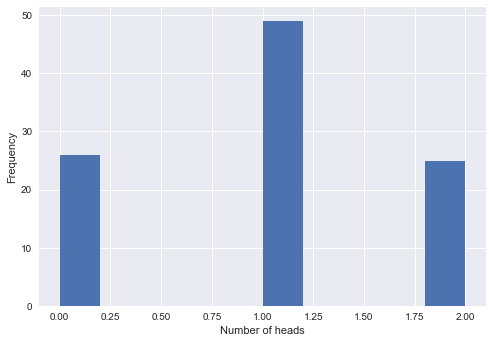

In [21]:
n=2
heads_count = []
heads_freq = []
for i in range(100):
    coin_results = np.random.randint(0,2,n)
    total_outcomes = 2^n
    heads = [c for c in coin_results if c==0]
    heads_count.append(heads)
for hc in heads_count:
    heads_freq.append(len(hc))
plt.hist(heads_freq)
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.show()

Drag the slidebar to increase the coin tosses (n)

In [22]:
@interact
def histogram_coins(n=(1,30,1)):
    heads_count = []
    heads_freq = []
    for i in range(100):
        coin_results = np.random.randint(0,2,n)
        total_outcomes = 2^n
        heads = [c for c in coin_results if c==0]
        heads_count.append(heads)
    for hc in heads_count:
        heads_freq.append(len(hc))
    plt.hist(heads_freq)
    plt.xlabel('Number of heads')
    plt.ylabel('Frequency')
    plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-interact',))

## Continuous distributions

We go on collecting fasting sugars of a very large number of patients. Drag the slider for number of patients.

In [23]:
@interact
def plot_random_fasting_sugar(n=(100,1000,100)):
    fasting_sugars = np.random.sample(n)*120+30
    plt.hist(fasting_sugars)
    plt.show()

interactive(children=(IntSlider(value=500, description='n', max=1000, min=100, step=100), Output()), _dom_classes=('widget-interact',))

Hmm. Does not seem to have a pattern. However, we now calculate the _mean_ and then plot the _differences_ from the mean of each data point, divided by the standard deviation.

In [24]:
@interact
def plot_random_fasting_sugar(n=(100,1000,100),bins=(10,100,10)):
    fasting_sugars = np.random.sample(n)*120+30
    diffs = (fasting_sugars-np.mean(fasting_sugars))/np.std(fasting_sugars)
    plt.hist(diffs,bins=bins)

interactive(children=(IntSlider(value=500, description='n', max=1000, min=100, step=100), IntSlider(value=50, description='bins', min=10, step=10), Output()), _dom_classes=('widget-interact',))

Interesting. It hints at a pattern, but still not very clear. Lets draw _k_ samples of size _j_ each from this and plot a histogram of their means.

In [25]:
@interact
def plot_sample_means(n=(10,10000,100),j=(10,100,10),k=(10,500,10)):
    fasting_sugars = np.random.sample(n)*120+30
    samples_drawn = []
    sample_means = []
    for i in range(k):
        sample_drawn = np.random.choice(fasting_sugars,size=j)
        samples_drawn.append(sample_drawn)
    sample_means = [np.mean(s) for s in samples_drawn]
    plt.hist(sample_means)

interactive(children=(IntSlider(value=4910, description='n', max=10000, min=10, step=100), IntSlider(value=50, description='j', min=10, step=10), IntSlider(value=250, description='k', max=500, min=10, step=10), Output()), _dom_classes=('widget-interact',))

This curve, which emerges from the sample means of _any_ measurement, is an approximation of the **normal distribution**